# Glass Ceiling - A Perspective on Women ocupation on informal work places.

## Objective: 
To demonstrate the position of women on informal work places, how does this affects their glass ceiling and if we can infer their current position as working force for Mexico.<br /> After our data exploration, we just came down to three data sources which are:
* Population by gender and earned salary.
* **Busy population by formality under economical activity**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Cleaning Sources
### Population working under informality

The further analysis will try to make a statment about the representation of women on informal workplaces.

In [2]:
informal_eco=pd.read_csv('Poblacion_Ocupada_Condicion_Informalidad.csv')

We'll look if dtypes are set up correctly:

In [3]:
informal_eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4721 entries, 0 to 4720
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Periodo                 4721 non-null   int64  
 1   Entidad_Federativa      4721 non-null   object 
 2   Sexo                    4721 non-null   object 
 3   Grupo_edad              4721 non-null   object 
 4   Condicion_informalidad  4721 non-null   object 
 5   Numero_personas         4721 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 221.4+ KB


Since our fields are categorical but the count of people; let's:
* Convert to datetime the period
* Let's check if there's any null values we need to remove:

In [4]:
informal_eco

,Periodo,Entidad_Federativa,Sexo,Grupo_edad,Condicion_informalidad,Numero_personas
0,20200301,Baja California,Hombre,65 AÑOS Y MAS,Formal,14841.000000
1,20210301,Baja California,Hombre,65 AÑOS Y MAS,Formal,16268.000000
2,20210601,Baja California,Hombre,65 AÑOS Y MAS,Formal,14645.000000
3,20200301,Baja California,Hombre,65 AÑOS Y MAS,Informal,17067.000000
4,20210301,Baja California,Hombre,65 AÑOS Y MAS,Informal,20616.000000
...,...,...,...,...,...,...
4716,20200601,Nacional,Mujer,NO ESPECIFICADO,Informal,5247.999981
4717,20200901,Nacional,Mujer,NO ESPECIFICADO,Informal,2631.000000
4718,20210301,Nacional,Mujer,NO ESPECIFICADO,Informal,6284.000000
4719,20210601,Nacional,Mujer,NO ESPECIFICADO,Informal,7090.000000


In [5]:
informal_eco['Periodo'] = pd.to_datetime(informal_eco['Periodo'],format='%Y%m%d')

In [6]:
informal_eco.head()

,Periodo,Entidad_Federativa,Sexo,Grupo_edad,Condicion_informalidad,Numero_personas
0,2020-03-01,Baja California,Hombre,65 AÑOS Y MAS,Formal,14841.0
1,2021-03-01,Baja California,Hombre,65 AÑOS Y MAS,Formal,16268.0
2,2021-06-01,Baja California,Hombre,65 AÑOS Y MAS,Formal,14645.0
3,2020-03-01,Baja California,Hombre,65 AÑOS Y MAS,Informal,17067.0
4,2021-03-01,Baja California,Hombre,65 AÑOS Y MAS,Informal,20616.0


Since this is an analysis on a very general POV; let's select `Nacional` as our location to work with, since the data is already loaded, after that, we'll look for Null values.

In [7]:
informal_eco=informal_eco.loc[informal_eco['Entidad_Federativa']=='Nacional']

In [8]:
informal_eco

,Periodo,Entidad_Federativa,Sexo,Grupo_edad,Condicion_informalidad,Numero_personas
1703,2020-03-01,Nacional,Hombre,15 A 24 AÑOS,Formal,1.777736e+06
1704,2021-03-01,Nacional,Hombre,15 A 24 AÑOS,Formal,1.602036e+06
1705,2021-06-01,Nacional,Hombre,15 A 24 AÑOS,Formal,1.648907e+06
1706,2020-03-01,Nacional,Hombre,15 A 24 AÑOS,Informal,3.776366e+06
1707,2021-03-01,Nacional,Hombre,15 A 24 AÑOS,Informal,3.651142e+06
...,...,...,...,...,...,...
4716,2020-06-01,Nacional,Mujer,NO ESPECIFICADO,Informal,5.248000e+03
4717,2020-09-01,Nacional,Mujer,NO ESPECIFICADO,Informal,2.631000e+03
4718,2021-03-01,Nacional,Mujer,NO ESPECIFICADO,Informal,6.284000e+03
4719,2021-06-01,Nacional,Mujer,NO ESPECIFICADO,Informal,7.090000e+03


Could we segregate more the data for the Null Values Cleanse?

In [9]:
informal_eco['Grupo_edad'].unique()

array(['15 A 24 AÑOS', '25 A 44 AÑOS', '45 A 64 AÑOS', '65 AÑOS Y MAS',
       'NO ESPECIFICADO'], dtype=object)

In [10]:
informal_eco.loc[informal_eco['Grupo_edad']=='NO ESPECIFICADO'].count()

Periodo                   36
Entidad_Federativa        36
Sexo                      36
Grupo_edad                36
Condicion_informalidad    36
Numero_personas           36
dtype: int64

In [11]:
informal_eco.loc[informal_eco['Grupo_edad']=='NO ESPECIFICADO'].count()

Periodo                   36
Entidad_Federativa        36
Sexo                      36
Grupo_edad                36
Condicion_informalidad    36
Numero_personas           36
dtype: int64

In [12]:
36/180

0.2

Since the Null values are almost 20% of the sample, we can't infere with which values to replace and if dropping them, we would lose a significant amount of data from the already narrow dataset

In [13]:
informal_eco['Periodo'].unique()

array(['2020-03-01T00:00:00.000000000', '2021-03-01T00:00:00.000000000',
       '2021-06-01T00:00:00.000000000', '2020-06-01T00:00:00.000000000',
       '2020-09-01T00:00:00.000000000', '2021-09-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

As per dates, we don't have very significant data to conclude anything, so let's explore this dataframe to see how in 2020 and 2021 the formal and informal work occupation affected women.
* Percentage of women vs men during 2020 on informal jobs vs formal jobs.
* Percentage of women vs men during 2021 on informal jobs vs formal jobs.

In order to group, we need to have period as Object rather than numeric:

In [14]:
informal_eco['Periodo'].map(str)

1703    2020-03-01 00:00:00
1704    2021-03-01 00:00:00
1705    2021-06-01 00:00:00
1706    2020-03-01 00:00:00
1707    2021-03-01 00:00:00
               ...         
4716    2020-06-01 00:00:00
4717    2020-09-01 00:00:00
4718    2021-03-01 00:00:00
4719    2021-06-01 00:00:00
4720    2021-09-01 00:00:00
Name: Periodo, Length: 180, dtype: object

In [15]:
informal_eco=informal_eco.astype({'Periodo': str})

In [16]:
informal_eco['Periodo']=informal_eco['Periodo'].str[:10]

In [17]:
informal_eco

,Periodo,Entidad_Federativa,Sexo,Grupo_edad,Condicion_informalidad,Numero_personas
1703,2020-03-01,Nacional,Hombre,15 A 24 AÑOS,Formal,1.777736e+06
1704,2021-03-01,Nacional,Hombre,15 A 24 AÑOS,Formal,1.602036e+06
1705,2021-06-01,Nacional,Hombre,15 A 24 AÑOS,Formal,1.648907e+06
1706,2020-03-01,Nacional,Hombre,15 A 24 AÑOS,Informal,3.776366e+06
1707,2021-03-01,Nacional,Hombre,15 A 24 AÑOS,Informal,3.651142e+06
...,...,...,...,...,...,...
4716,2020-06-01,Nacional,Mujer,NO ESPECIFICADO,Informal,5.248000e+03
4717,2020-09-01,Nacional,Mujer,NO ESPECIFICADO,Informal,2.631000e+03
4718,2021-03-01,Nacional,Mujer,NO ESPECIFICADO,Informal,6.284000e+03
4719,2021-06-01,Nacional,Mujer,NO ESPECIFICADO,Informal,7.090000e+03


Due to ease of tools and lack of time, will define 4 dataframes, no considering age category to group by formality status and gender.

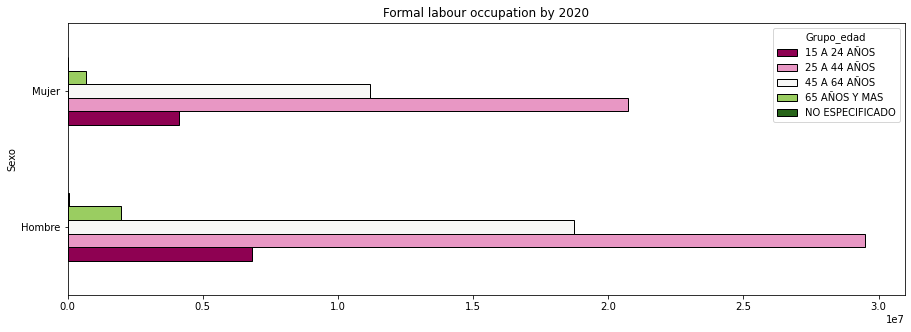

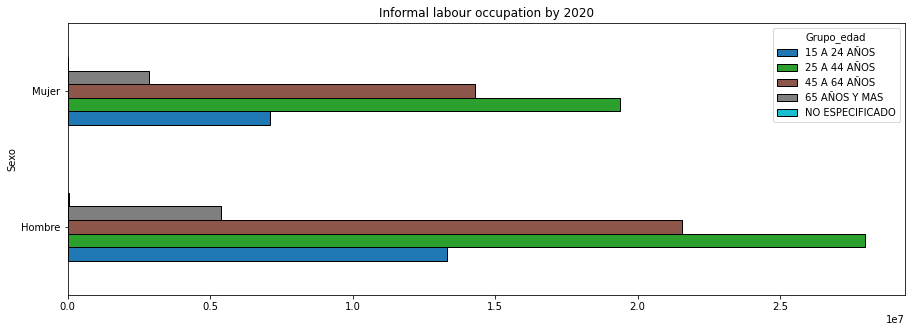

In [59]:
# grafiquemos genero a genero, por categoria de edad por ambos años - formalidad para 2020
a1 = informal_eco.loc[(
    (informal_eco['Periodo'].str[3].isin(['0'])) &
    (informal_eco['Condicion_informalidad'] == 'Formal'))
                      ].groupby(['Sexo','Grupo_edad']).sum()['Numero_personas'].unstack()
a1.plot(kind="barh",colormap='PiYG',edgecolor='Black',figsize=(15,5),title='Formal labour occupation by 2020')

# grafiquemos genero a genero, por categoria de edad por ambos años - informalidad para 2020
a2 = informal_eco.loc[(
    (informal_eco['Periodo'].str[3].isin(['0'])) &
    (informal_eco['Condicion_informalidad'] == 'Informal'))
                      ].groupby(['Sexo','Grupo_edad']).sum()['Numero_personas'].unstack()
a2.plot(kind="barh",colormap='tab10',edgecolor='Black',figsize=(15,5),title='Informal labour occupation by 2020')

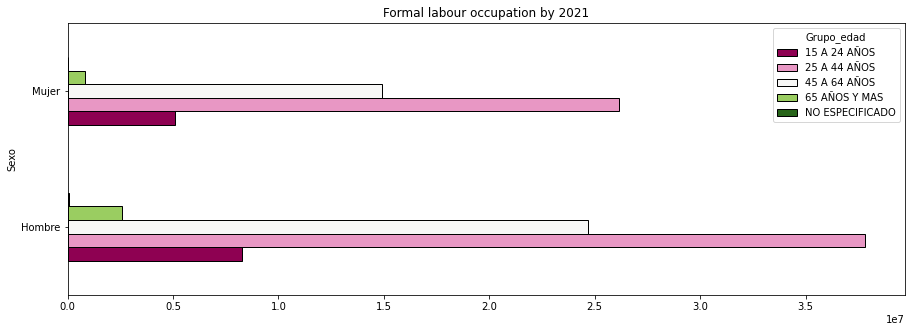

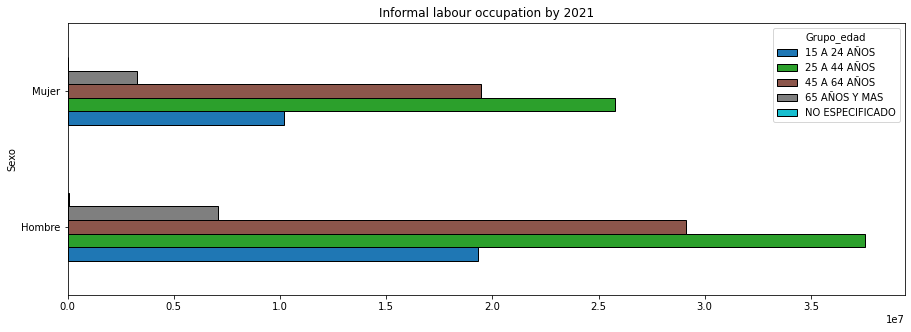

In [60]:

# grafiquemos genero a genero, por categoria de edad por ambos años - formalidad para 2021
a3 = informal_eco.loc[(
    (informal_eco['Periodo'].str[3].isin(['1'])) &
    (informal_eco['Condicion_informalidad'] == 'Formal'))
                      ].groupby(['Sexo','Grupo_edad']).sum()['Numero_personas'].unstack()
a3.plot(kind="barh",colormap='PiYG',edgecolor='Black',figsize=(15,5),title='Formal labour occupation by 2021')

# grafiquemos genero a genero, por categoria de edad por ambos años - informalidad para 2021
a4 = informal_eco.loc[(
    (informal_eco['Periodo'].str[3].isin(['1'])) &
    (informal_eco['Condicion_informalidad'] == 'Informal'))
                      ].groupby(['Sexo','Grupo_edad']).sum()['Numero_personas'].unstack()
a4.plot(kind="barh",colormap='tab10',edgecolor='Black',figsize=(15,5),title='Informal labour occupation by 2021')

##### Gender by Formality Status

In [19]:
ecoMF = (
    informal_eco.loc[
        ((informal_eco['Sexo'] == 'Mujer') & 
         (informal_eco['Condicion_informalidad'] == 'Formal'))]
    .groupby('Periodo')
    .agg({'Numero_personas':'sum'})
    .reset_index()
)
ecoMF=ecoMF.rename(columns = {'Numero_personas':'Mujeres_Formalidad'})

In [20]:
ecoMF

,Periodo,Mujeres_Formalidad
0,2020-03-01,1.884253e+07
1,2020-06-01,8.863090e+06
2,2020-09-01,9.060760e+06
3,2021-03-01,1.847410e+07
4,2021-06-01,1.903592e+07
5,2021-09-01,9.556098e+06


In [21]:
ecoHF = (
    informal_eco.loc[
        ((informal_eco['Sexo'] == 'Hombre') & 
         (informal_eco['Condicion_informalidad'] == 'Formal'))]
    .groupby('Periodo')
    .agg({'Numero_personas':'sum'})
    .reset_index()
)
ecoHF=ecoHF.rename(columns = {'Numero_personas':'Hombres_Formalidad'})

In [22]:
ecoHF

,Periodo,Hombres_Formalidad
0,2020-03-01,2.977140e+07
1,2020-06-01,1.304537e+07
2,2020-09-01,1.421525e+07
3,2021-03-01,2.913173e+07
4,2021-06-01,2.940037e+07
5,2021-09-01,1.484589e+07


##### Gender by Informality Status

In [23]:
ecoMI = (
    informal_eco.loc[
        ((informal_eco['Sexo'] == 'Mujer') & 
         (informal_eco['Condicion_informalidad'] == 'Informal'))]
    .groupby('Periodo')
    .agg({'Numero_personas':'sum'})
    .reset_index()
)
ecoMI=ecoMI.rename(columns = {'Numero_personas':'Mujeres_Informalidad'})

In [24]:
ecoMI

,Periodo,Mujeres_Informalidad
0,2020-03-01,2.472320e+07
1,2020-06-01,8.776774e+06
2,2020-09-01,1.012984e+07
3,2021-03-01,2.213012e+07
4,2021-06-01,2.429480e+07
5,2021-09-01,1.227930e+07


In [25]:
ecoHI = (
    informal_eco.loc[
        ((informal_eco['Sexo'] == 'Hombre') & 
         (informal_eco['Condicion_informalidad'] == 'Informal'))]
    .groupby('Periodo')
    .agg({'Numero_personas':'sum'})
    .reset_index()
)
ecoHI=ecoHI.rename(columns = {'Numero_personas':'Hombres_Informalidad'})

In [26]:
ecoHI

,Periodo,Hombres_Informalidad
0,2020-03-01,3.677977e+07
1,2020-06-01,1.402983e+07
2,2020-09-01,1.740487e+07
3,2021-03-01,3.621059e+07
4,2021-06-01,3.775441e+07
5,2021-09-01,1.915494e+07


In [27]:
formalJ=pd.merge(ecoMF, ecoHF, on ='Periodo', how ="inner")

In [28]:
informalJ=pd.merge(ecoMI, ecoHI, on ='Periodo', how ="inner")

In [29]:
finalJ=pd.merge(formalJ,informalJ, on='Periodo',how='inner')

In [30]:
finalJ

,Periodo,Mujeres_Formalidad,Hombres_Formalidad,Mujeres_Informalidad,Hombres_Informalidad
0,2020-03-01,1.884253e+07,2.977140e+07,2.472320e+07,3.677977e+07
1,2020-06-01,8.863090e+06,1.304537e+07,8.776774e+06,1.402983e+07
2,2020-09-01,9.060760e+06,1.421525e+07,1.012984e+07,1.740487e+07
3,2021-03-01,1.847410e+07,2.913173e+07,2.213012e+07,3.621059e+07
4,2021-06-01,1.903592e+07,2.940037e+07,2.429480e+07,3.775441e+07
5,2021-09-01,9.556098e+06,1.484589e+07,1.227930e+07,1.915494e+07


In [31]:
finalJ.set_index('Periodo')

,Mujeres_Formalidad,Hombres_Formalidad,Mujeres_Informalidad,Hombres_Informalidad
Periodo,,,,
2020-03-01,1.884253e+07,2.977140e+07,2.472320e+07,3.677977e+07
2020-06-01,8.863090e+06,1.304537e+07,8.776774e+06,1.402983e+07
2020-09-01,9.060760e+06,1.421525e+07,1.012984e+07,1.740487e+07
2021-03-01,1.847410e+07,2.913173e+07,2.213012e+07,3.621059e+07
2021-06-01,1.903592e+07,2.940037e+07,2.429480e+07,3.775441e+07
2021-09-01,9.556098e+06,1.484589e+07,1.227930e+07,1.915494e+07


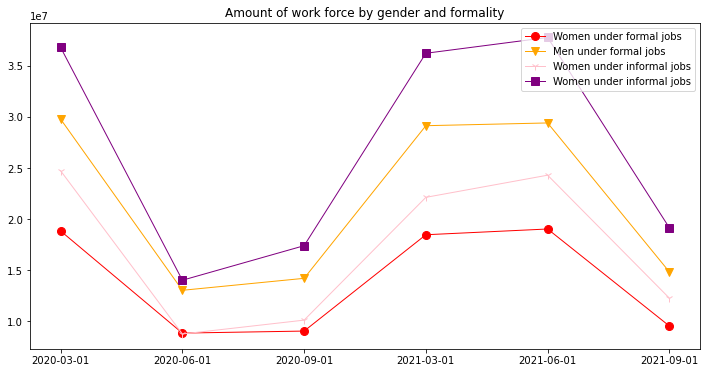

In [71]:
plt.figure(figsize=(12, 6))
plt.title('Amount of work force by gender and formality')

x=finalJ['Periodo']
y1=finalJ['Mujeres_Formalidad']
y2=finalJ['Hombres_Formalidad']
y3=finalJ['Mujeres_Informalidad']
y4=finalJ['Hombres_Informalidad']

plt.plot(x,y1,color='red', linewidth=1,marker='o', markersize=8, label='Women under formal jobs')
plt.plot(x,y2,color='orange', linewidth=1,marker='v', markersize=8, label='Men under formal jobs')
plt.plot(x,y3,color='pink', linewidth=1,marker='1', markersize=8, label='Women under informal jobs')
plt.plot(x,y4,color='purple', linewidth=1,marker='s', markersize=8, label='Women under informal jobs')
plt.legend()

As per below results, knowing about the salary data we have previously; we can partialy confirm (since we only have 2 years data) that even though women are more present as work force, they're still on positions of lower power and really underpaid; since as we show, they represent only 30% of earning population and from that, over 60% earn barely 3 minimum wages.

With this brief analysis, we see that there's still a long way mexican woman and institutions will need to go in order to show true equality between genders and pay gap.

Q.E.D. - IZ